In [2]:
import sys

sys.argv[1]

'--f=/home/breno/.local/share/jupyter/runtime/kernel-v2-648LsIySOh6Pm5T.json'

In [1]:
from diffusers import AutoPipelineForText2Image
import torch
import unicodedata
import re



def slugify(value, allow_unicode=True):
    if allow_unicode:
        value = unicodedata.normalize('NFKC', value)
        value = re.sub('[^\w\s-]', '', value, flags=re.U).strip().lower()
        return re.sub('[-\s]+', '-', value, flags=re.U)
    value = unicodedata.normalize('NFKD', value).encode('ascii', 'ignore').decode('ascii')
    value = re.sub('[^\w\s-]', '', value).strip().lower()
    return re.sub('[-\s]+', '-', value)

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = "Food photography, studio photography,burger patty,focus on the delicious patty, vibrant toppings, vegetables,natural colors, natural features."

image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image.save(slugify(prompt)+".jpg")

/home/breno/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-25 09:58:18.329567: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 09:58:20.025829: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
100%|██████████| 1/1 [00:29<00:00, 29.24s/it]


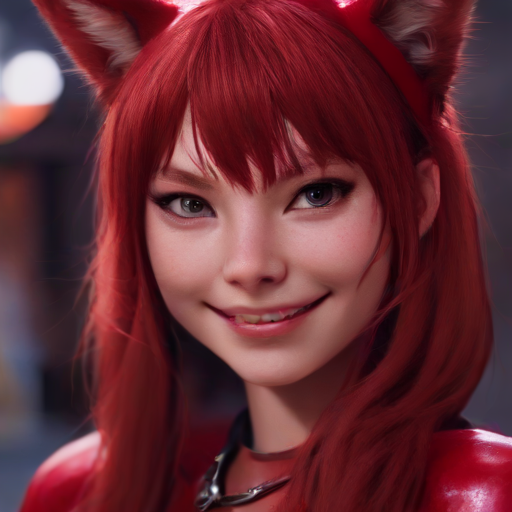

In [ ]:
image

In [2]:
prompt = "build woman Juliana, kisses"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image.save(slugify(prompt)+".jpg")

100%|██████████| 1/1 [00:09<00:00,  9.59s/it]


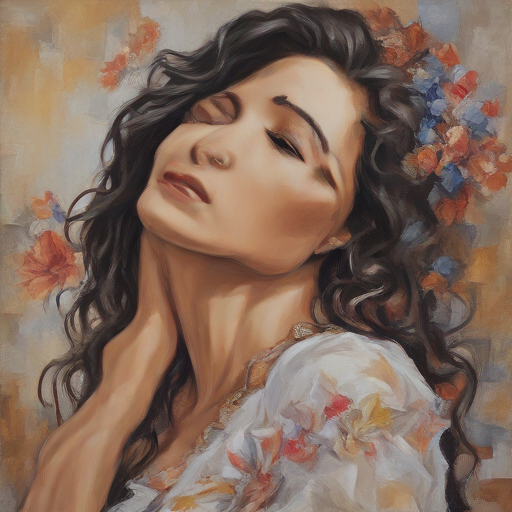

In [3]:
image